In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("gld_price_data.csv")

In [4]:
df.head(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
df.shape

(2290, 6)

In [13]:
df.duplicated().sum()

0

In [14]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
(df.corr())

C:\Users\vicky\AppData\Local\Temp\ipykernel_26532\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\vicky\AppData\Local\Temp\ipykernel_26532\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

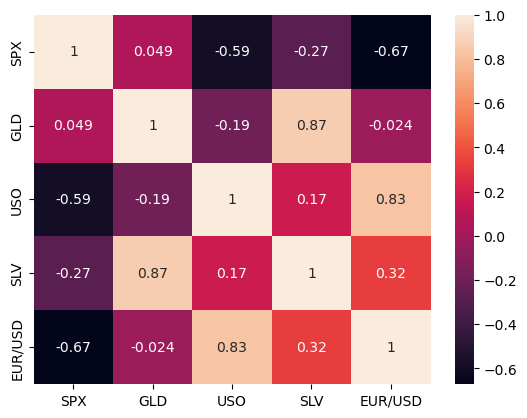

In [12]:
sns.heatmap(df.corr(),annot=True)

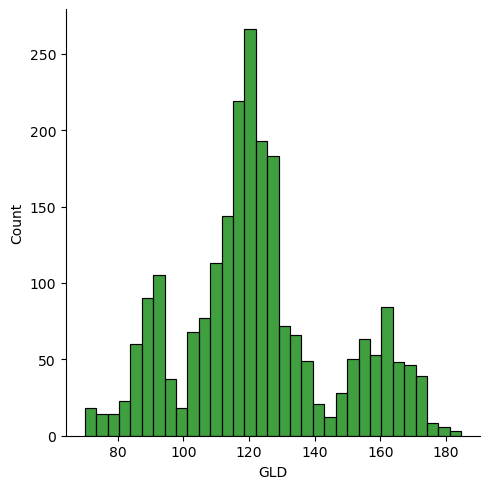

In [18]:
sns.displot(df['GLD'],color='green')
plt.show()

In [19]:
x=df.drop(['Date','GLD'],axis=1)

In [20]:
y=df["GLD"]

In [21]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [22]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100)

In [28]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [29]:
train_data_prediction=regressor.predict(X_test)

In [30]:
train_data_prediction

array([122.57889982, 130.26760285, 127.58730021,  96.70889728,
       119.0177007 , 114.59239928, 124.71000147, 117.7951995 ,
       107.95480134,  98.08689958,  95.74369966, 167.83159839,
       150.12780182, 116.31600043, 170.85950158,  85.11459984,
       123.26979895, 109.21059702, 113.16060098, 131.42840323,
       124.36419881, 113.53160045, 116.14040059, 108.91489996,
       108.35910118, 125.79159936, 119.74139948, 112.29389935,
       113.35850078, 125.45129905, 146.33920156,  89.66820002,
       167.9785999 , 113.62239963, 108.59770126, 120.31310083,
       142.09339919, 161.15340098, 174.08209742, 152.94060094,
       119.32810111, 113.50330056, 121.3733993 , 113.66519941,
       121.98943816, 107.87670057,  88.83079869, 114.54649906,
       129.75520235, 117.88440113, 104.00579951, 129.73840255,
       107.02499885, 160.7188038 , 131.73970038, 118.37029992,
       146.96400094, 135.83190214,  95.40710086, 124.71970141,
       114.6234987 ,  86.12350091, 104.28809904, 113.72

In [32]:
from sklearn.metrics import r2_score

In [33]:
error_score=r2_score(y_test,train_data_prediction)

In [34]:
error_score

0.9897546931927538

In [35]:
y_list=list(y_test)

Text(0, 0.5, 'gold price')

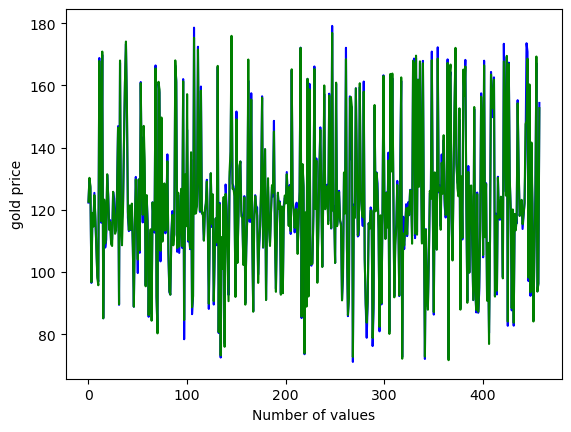

In [41]:
plt.plot(y_list,color='blue')
plt.plot(train_data_prediction,color='green')
plt.xlabel('Number of values')
plt.ylabel("gold price")